# 600 K test

The diffusion coefficient for Li @600k is 3.6813399806893925e-09 m^2/s
The diffusion coefficient for Sc @600k is 8.492362933268768e-11 m^2/s
The diffusion coefficient for Cl @600k is 4.084026136670077e-10 m^2/s
The conductivity for Li @600k is 1.777592205063727 S/cm
The conductivity for Sc @600k is 0.012060018683729853 S/cm
The conductivity for Cl @600k is 0.3711322690428325 S/cm


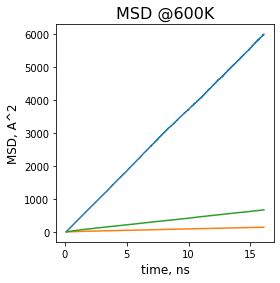

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Import MSD files as lists:
li_step, li = np.loadtxt('triclinic_9x9x9_600_li.txt', skiprows=2, unpack=True)
sc_step, sc = np.loadtxt('triclinic_9x9x9_600_sc.txt', skiprows=2, unpack=True)
cl_step, cl = np.loadtxt('triclinic_9x9x9_600_cl.txt', skiprows=2, unpack=True)

steps = li_step / 1000000

li = li - li[1]
sc = sc - sc[1]
cl = cl - cl[1]

# Plot MSD:   
plt.plot(steps[1:], li[1:])
plt.plot(steps[1:], sc[1:])
plt.plot(steps[1:], cl[1:])

plt.xlabel('time, ns', size = 12)
plt.ylabel('MSD, A^2', size = 12)
plt.title('MSD @600K', size=16)

# Find diffusion coefficient:
li_slope, intercept = np.polyfit(steps[6000:], li[6000:], 1)
li_slope_standard_600 = float(li_slope * (10 ** (-11)))
sc_slope, intercept = np.polyfit(steps[6000:], sc[6000:], 1)
sc_slope_standard_600 = float(sc_slope * (10 ** (-11)))
cl_slope, intercept = np.polyfit(steps[6000:], cl[6000:], 1)
cl_slope_standard_600 = float(cl_slope * (10 ** (-11)))

print(f'The diffusion coefficient for Li @600k is {li_slope_standard_600} m^2/s')
print(f'The diffusion coefficient for Sc @600k is {sc_slope_standard_600} m^2/s')
print(f'The diffusion coefficient for Cl @600k is {cl_slope_standard_600} m^2/s')

li_cond = (((1.602 * 10**(-19))**2 * (1.559 * 10**(28)) * li_slope_standard_600)/((1.381 * 10**(-23)) * 600) * 10**(-2))
sc_cond = (((1.602 * 10**(-19))**2 * (4.585 * 10**(27)) * sc_slope_standard_600)/((1.381 * 10**(-23)) * 600) * 10**(-2))
cl_cond = (((1.602 * 10**(-19))**2 * (2.934 * 10**(28)) * cl_slope_standard_600)/((1.381 * 10**(-23)) * 600) * 10**(-2))

print(f'The conductivity for Li @600k is {li_cond} S/cm')
print(f'The conductivity for Sc @600k is {sc_cond} S/cm')
print(f'The conductivity for Cl @600k is {cl_cond} S/cm')

# Conversion of diffusion coefficient to conductivity as follows:
# conducitivity = (charge**2 * charge carrier concentration * diffusion coefficient) / boltzmann constant * temperature
#
# charge is electron charge (sodium singularly charged), so 1.602 * 10**(-19) C
#
# charge carrier concentration calculated as number of Li/Sc/Cl ions in the simulation cell/cell dimensions
#
# diffusion coefficient calcualted as above fromm MSD plot slopes
#
# boltzmann constant = 1.381 * 10**(-23) J/K
#
# temperature varies with experiment
#
# !!! 10**(-2) added to get final results in S/cm as conventionally displayed

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('msd_all_600.jpg', bbox_inches='tight', dpi=500)